In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

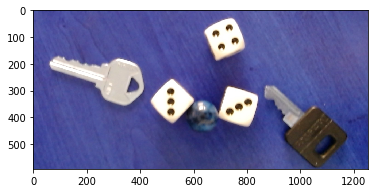

In [89]:
og_img = cv2.imread('images/diewithobjects.PNG')
plt.imshow(og_img, cmap='gray')

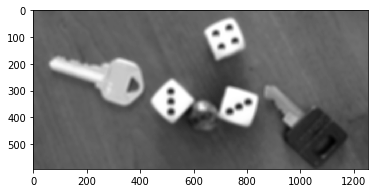

In [90]:
img = cv2.cvtColor(og_img, cv2.COLOR_BGR2GRAY)
img = cv2.blur(img, (15, 15))
plt.imshow(img, cmap='gray')

In [91]:
print(img.shape)

(593, 1253)


In [92]:
ret, thresh1 = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

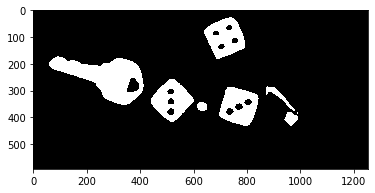

In [93]:
plt.imshow(thresh1, cmap='gray')

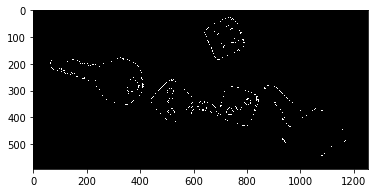

In [94]:
edges = cv2.Canny(img, 40, 40)
plt.imshow(edges, cmap = 'gray')

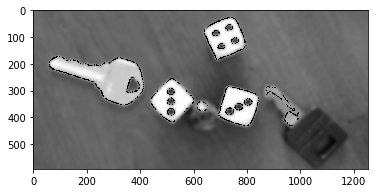

In [95]:
contours = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
canvas = np.zeros_like(img)
for contour in contours:
    cv2.drawContours(img, contour, -1, (0, 255, 0), 3)
plt.imshow(img, cmap='gray')

4


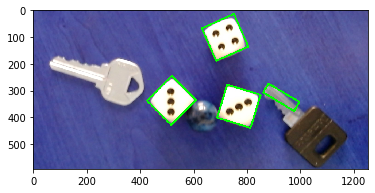

In [96]:
another = og_img.copy()
count = 0
bigRects= []
contours = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
for contour in contours:
    rect = cv2.minAreaRect(contour)
    area = rect[1][0] * rect[1][1]
    if area < 5000 or area > 25000:
        continue
    bigRects.append(rect)
    count += 1
    points = cv2.boxPoints(rect)
    box = np.int0(points)
    cv2.drawContours(og_img,[box],0,(0,255,0),5)

plt.imshow(og_img)
print(count)

10


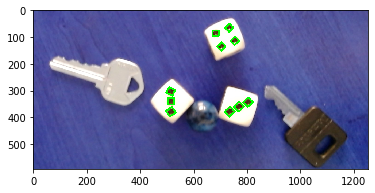

In [98]:
SENSITIVITY = 800
contours = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
count = 0
for contour in contours:
    rect = cv2.minAreaRect(contour)
    area = rect[1][0] * rect[1][1]
    if area > SENSITIVITY:
        continue

    skip = True
    for bigrec in bigRects:
        if cv2.rotatedRectangleIntersection(rect, bigrec)[0] == cv2.INTERSECT_FULL:
            skip = False
    if skip == True:
        continue

    count += 1
    points = cv2.boxPoints(rect)
    box = np.int0(points)
    cv2.drawContours(another,[box],0,(0,255,0),5)

plt.imshow(another)
print(count)